## Multiple Linear Regression 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Libraies

In [1]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Numpy and Pandas
import numpy as np
import pandas as pd

from math import sqrt

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Reading and Understanding the Data

In [2]:
# Read the dataset
bike_data = pd.read_csv(r'D:\Upgrade Master Degree\Linear Regression\Bike Sharing\day.csv',
                       parse_dates=['dteday'])

# the first 5 rows of the dataframe
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the number of rows and columns of the dataframe
bike_data.shape

(730, 16)

In [4]:
# info of the dataframe
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

<b>Inference: </b> There are no null values present in the dataset.
Also, one column is of 'date' type and all other columns are of 'int' or 'float' type.

In [5]:
# the summary of the numerical cols present in the dataframe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Missing value check
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>Inference: </b> No null values in the dataset.

In [7]:
# Duplicate value check

print(bike_data.shape)

bike_data.drop_duplicates(subset=None, inplace=True)

#The shape
print(bike_data.shape)

(730, 16)
(730, 16)


<b> Inference: </b> No duplicated records

#### As per the data dictionary the following columns can be removed from the dataset:
- 'instant' - It is the record index value
- 'dteday' - It is the date column. Since, we already have 'yr' and 'mnth' columns present in the dataset, this column doesn't provide much information.
- 'casual' and 'registered' - The 'cnt' column is the count of total rental bikes including both casual and registered. Since, our dependent variable is 'cnt', we can drop these columns.

In [8]:
# Dropping redundant columns
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# the shape 
bike_data.shape

(730, 12)

In [9]:
# Renaming the names of some of the columns for better understanding
bike_data.rename({'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count'}, axis=1, inplace=True)

# the first 5 rows of the dataframe 
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Encoding of Columns and Visualizing the data

In [10]:
# Mapping 'season' column 
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Checking 
bike_data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# Mapping 'weathersit'

bike_data['weathersit'] = bike_data['weathersit'].map({1:'clear', 2:'misty', 3:'light_rain_&_snow', 4:'heavy_rain_&_snow'})

# Checking 
bike_data['weathersit'].value_counts()

clear                463
misty                246
light_rain_&_snow     21
Name: weathersit, dtype: int64

In [12]:
# Mapping 'month' column 
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
bike_data['month'] = bike_data['month'].map(months)

# Checking 
bike_data['month'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: month, dtype: int64

In [13]:
# Mapping 'weekday' column 
weekdays = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thr', 5:'Fri', 6:'Sat'}
bike_data['weekday'] = bike_data['weekday'].map(weekdays)

# Checking 
bike_data['weekday'].value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thr    104
Fri    104
Wed    103
Name: weekday, dtype: int64

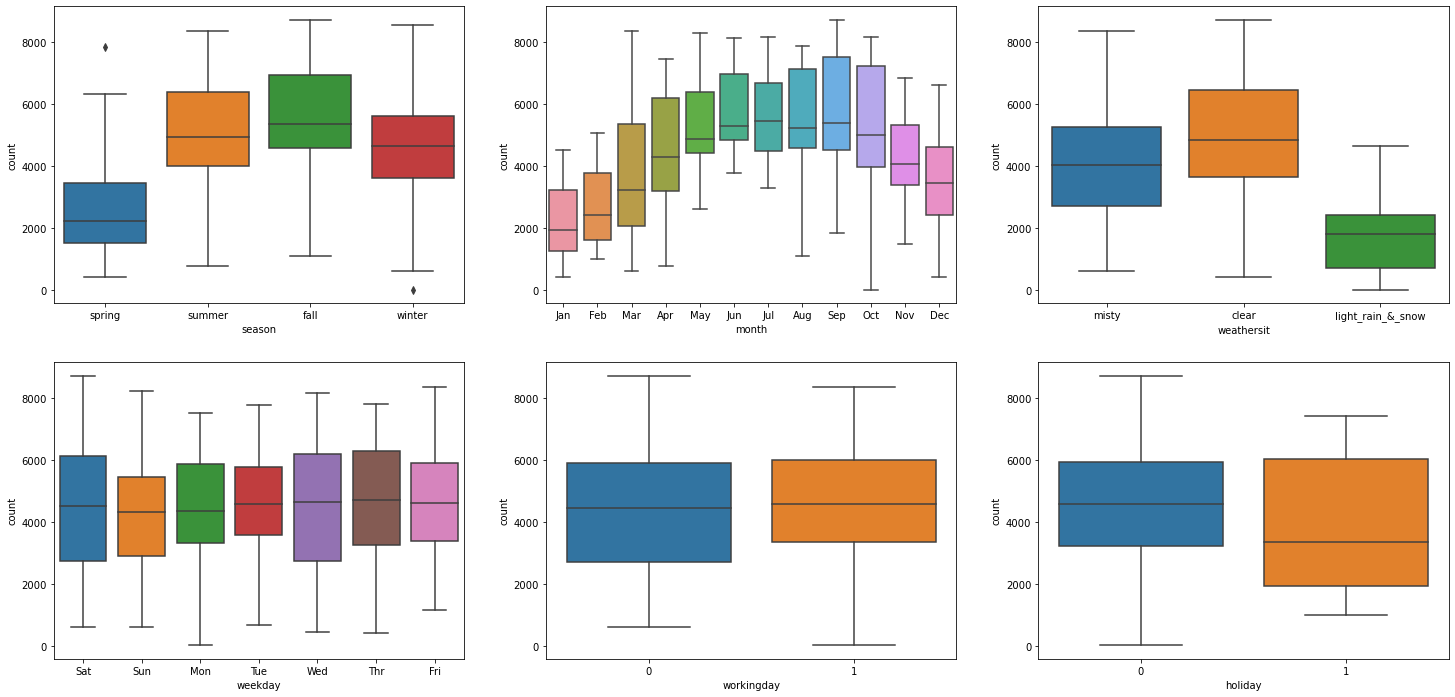

In [14]:
# Plotting a boxplot for all categorical data
plt.figure(figsize=(25, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y='count', data=bike_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'month', y='count', data=bike_data)

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y='count', data=bike_data)

plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y='count', data=bike_data)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y='count', data=bike_data)

plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y='count', data=bike_data)

plt.show()


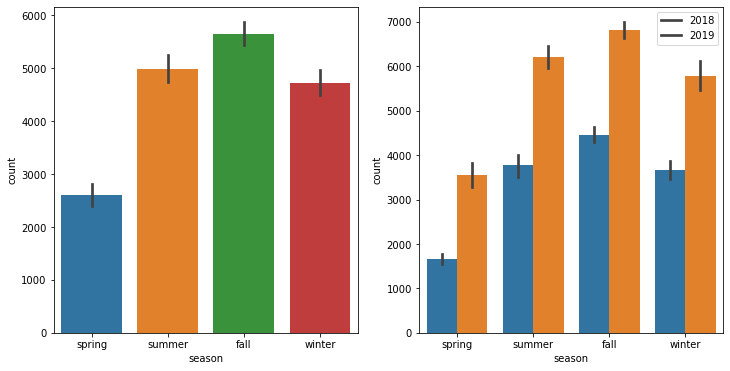

In [15]:
# 'Season' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'season', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'season', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- Most of bike rental bookings were happening in the fall season.
- Bookings increased in the year 2019 compared to the year 2018.

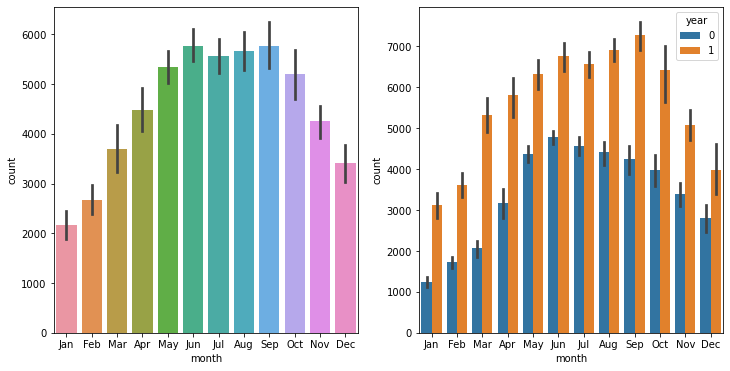

In [16]:
# 'Month' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'month', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'month', y='count', hue='year', data=bike_data)

#plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- Most bike bookings were happening in the months 'May' to 'September'.
- 'September' saw the maximum number of bookings in the year 2019.

&nbsp;

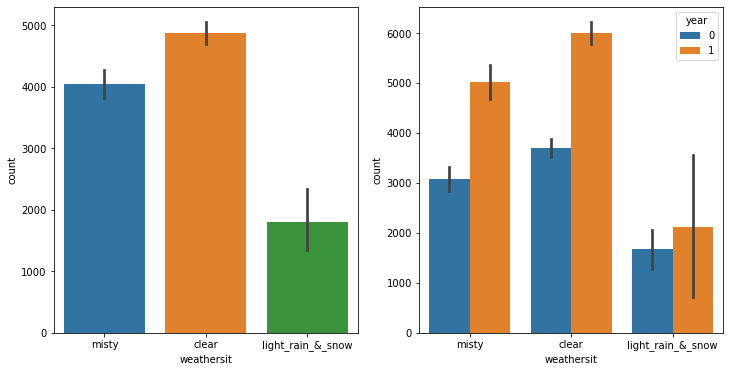

In [17]:
# 'Weathersit' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y='count', hue='year', data=bike_data)


plt.show()

### Inference:
- Normally, most bike booking happened when the weather was clear.
- As we saw earlier, bike booking increased in the year 2019 and maximum bookings were made when the weather was clear.

&nbsp;


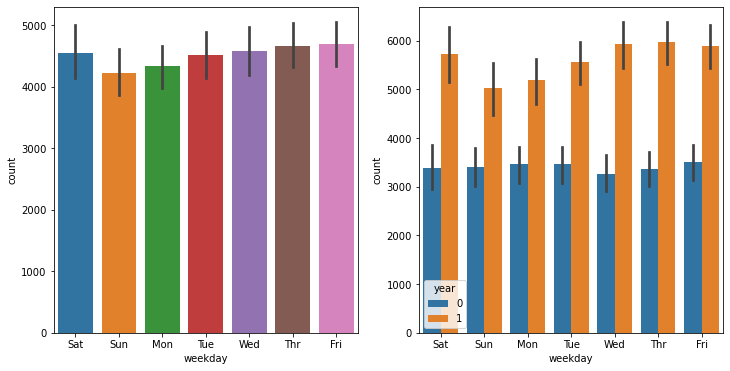

In [18]:
# 'Weekday' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'weekday', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y='count', hue='year', data=bike_data)

plt.show()

### Inference:
- There is no significant differences between the booking in the days of the week.
- Clearly, 2019 has higher rental bookings

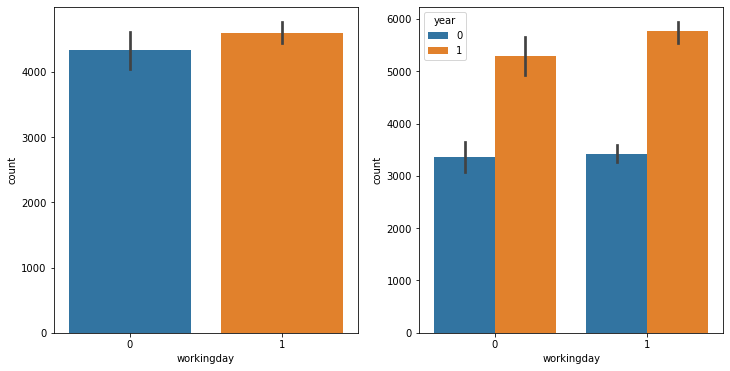

In [19]:
# 'Workingday' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'workingday', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'workingday', y='count', hue='year', data=bike_data)


plt.show()

### Inference:
- Workingdays of course have more bike bookings.

&nbsp;

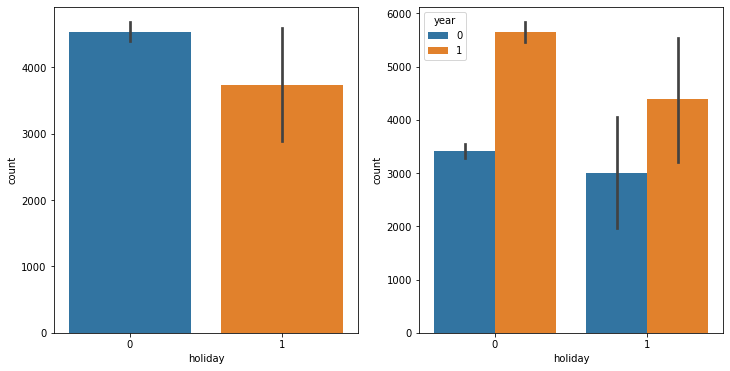

In [20]:
# 'Holiday' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y='count', hue='year', data=bike_data)


plt.show()

### Inference:
- Most of the bike bookings happened when it was not a holiday.

&nbsp;

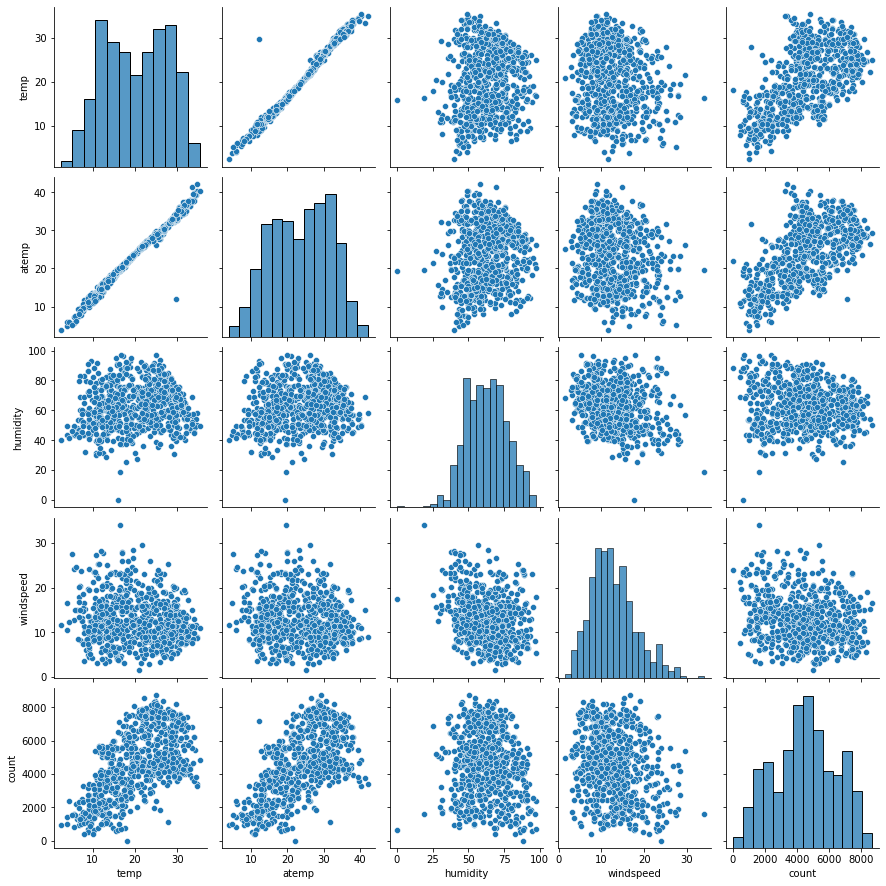

In [21]:
# Plot a pairplot for all numerical cols
data = ['temp',
 'atemp',
 'humidity',
 'windspeed',
 'count']
sns.pairplot(bike_data[data])

### Inference:
- Bike rental counts show a positive correlation with 'temp' and 'atemp'.
- Bike rental counts show a negative correlation with 'humidity'.
- Bike rental counts show a negative correlation with 'windspeed'. 

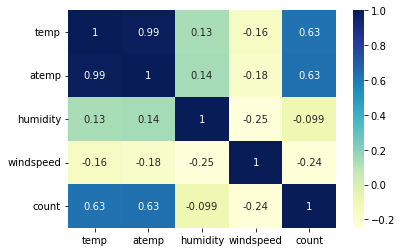

In [22]:
# Plotting a heatmap for all numerical cols.
sns.heatmap(bike_data[data].corr(), annot=True, cmap='YlGnBu')
plt.show()

### Inference:
- 'temp' and 'atemp' variables are positively correlated with 'count'.
- 'humidity'and 'windspeed' variables are negatively correlated with 'count'.
- 'temp' and 'atemp' variables are highly correlated with each other and hence one of them must be dropped to avoid multicollinearity.

## Data Preparation

In [23]:
#Cheking datatypes for columns

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.3+ KB


In [24]:
#create dummy variables for object columns

obj_columns = bike_data.select_dtypes(include=["object"]).columns.to_list()
dummies = pd.get_dummies(bike_data[obj_columns], drop_first=True)

In [25]:
#concatentation

bike_data = pd.concat([bike_data,dummies], axis=1)

In [26]:
#dropping old columns

bike_data.drop(obj_columns, axis = 1 , inplace = True)

In [27]:
#checking the shape again 
bike_data.shape

(730, 30)

&nbsp;

## Splitting the data into Train and Test

In [28]:
# Splitting the data into train and test
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state=100)

#the shape of 'df_train' 
print("Shape of training dataset",df_train.shape, '\n')

# the shape of 'df_test' 
print("Shape of Testing dataset",df_test.shape)

Shape of training dataset (510, 30) 

Shape of Testing dataset (220, 30)


In [29]:
# Rescaling 'df_train' dataframe

# Instantiate an object
scaler = MinMaxScaler()

# Applying scaler()
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Fit the scaler on the data
df_train[cols] = scaler.fit_transform(df_train[cols])

# Checking
df_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].describe()

,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


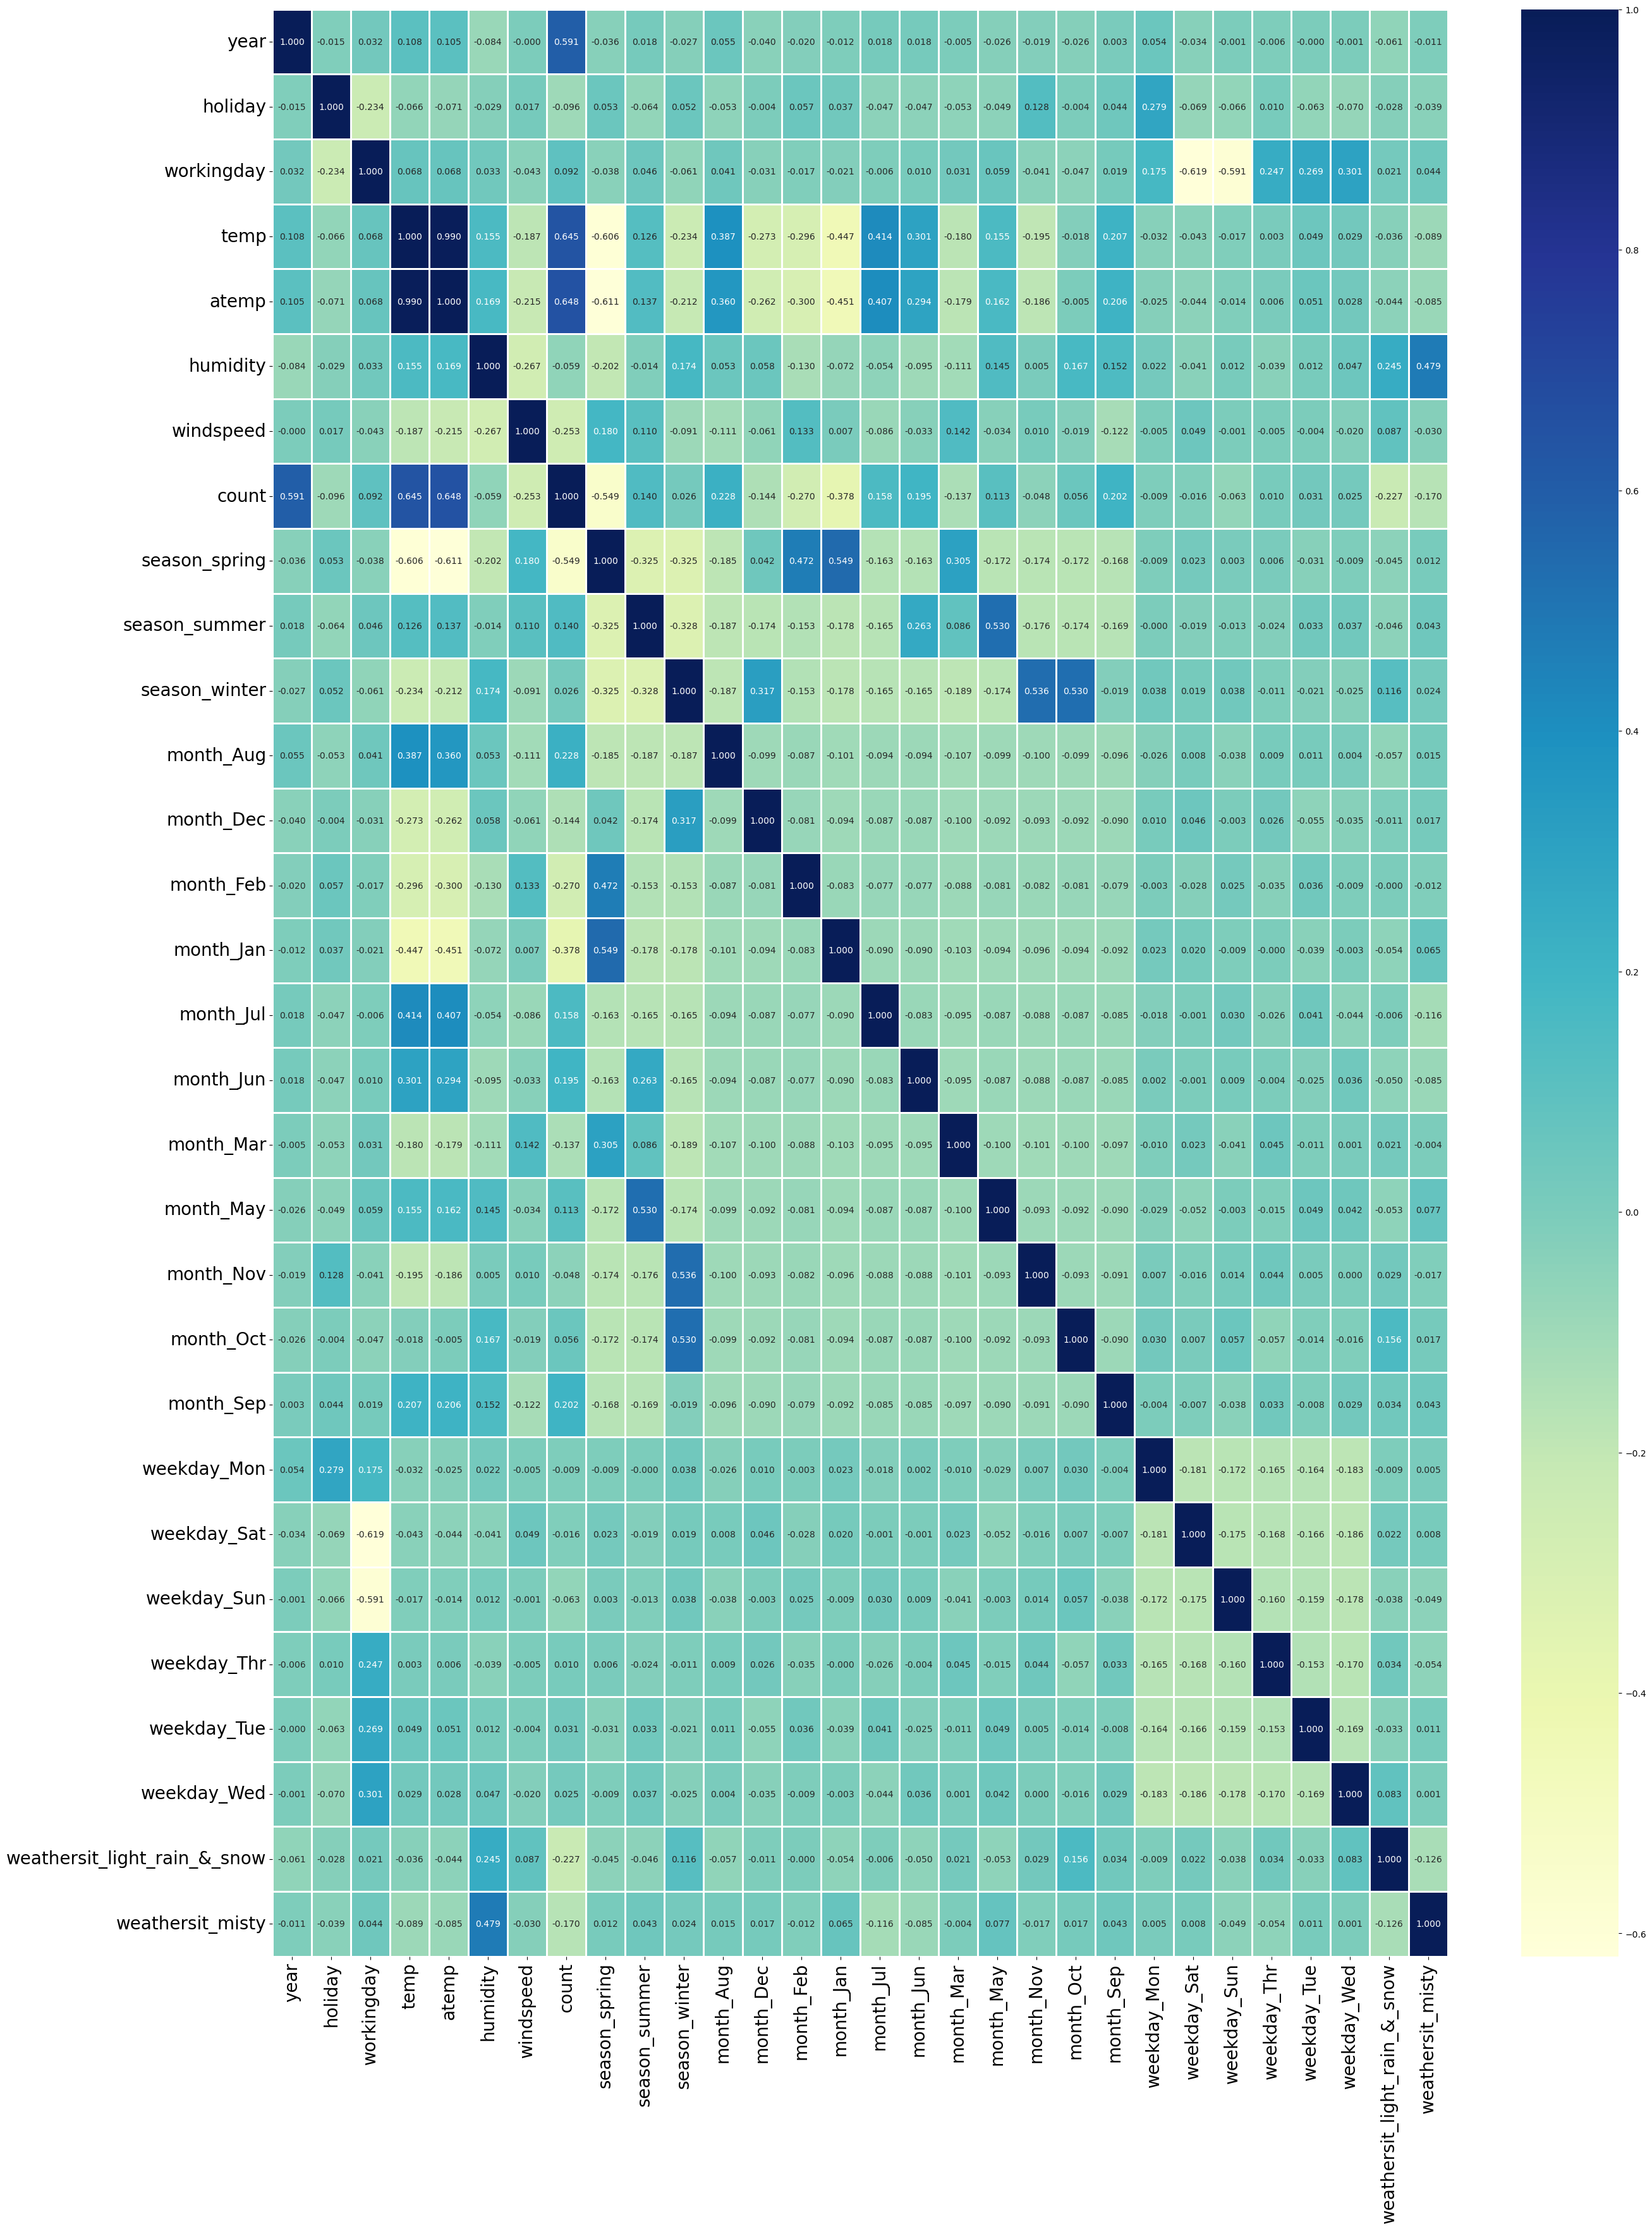

In [30]:
# correlation using heatmap
sns.reset_defaults()
plt.figure(figsize=(30,40))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu', fmt='.3f', linewidths=1)
plt.xticks(rotation=90, fontsize = 20)
plt.yticks(rotation=0, fontsize = 20)
plt.show()

### Inference:
- 'temp', 'atemp' and 'year' have strong correlation with 'count'.
- 'Spring' season is negatively correlated with 'count'.
- 'temp' and 'atemp' are highly correlated with each other. Thus, we can use any one of the variables.
- 'humidity' and 'misty' weather are correlated with each other.
- 'Winter' and months 'Oct', 'Nov' and 'Dec' are correlated with each other.
- 'Workingday' has negative correlation with 'Sat' and 'Sun'.

## Training the model

- We would find out 15 variables by using an automated approach of RFE and then use manual approach to eliminate some other variabes based on 'p' and 'VIF' values.

In [31]:
# Splitting 'df_train' dataframe into 'X_train' and 'y_train'
y_train = df_train.pop('count')
X_train = df_train

In [32]:
# Feature selection using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE 
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [33]:
# Checking the 15 predictor variables which have been selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 8),
 ('month_Dec', False, 4),
 ('month_Feb', False, 5),
 ('month_Jan', False, 2),
 ('month_Jul', True, 1),
 ('month_Jun', False, 14),
 ('month_Mar', False, 15),
 ('month_May', False, 6),
 ('month_Nov', False, 3),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thr', False, 13),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_light_rain_&_snow', True, 1),
 ('weathersit_misty', True, 1)]

In [34]:
# Storing 
cols = X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_Jul',
       'month_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_light_rain_&_snow', 'weathersit_misty'],
      dtype='object')

In [35]:
# the cols which are not selected by RFE
X_train.columns[~ rfe.support_]

Index(['atemp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'weekday_Mon', 'weekday_Thr', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [36]:
# Creating 'X_train' using cols selected by RFE
X_train_rfe = X_train[cols]

# Checking the first 5 rows of the dataframe
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Jul,month_Sep,weekday_Sat,weekday_Sun,weathersit_light_rain_&_snow,weathersit_misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


&nbsp;

## Building Linear Model using Statsmodel

In [37]:
# Since VIF needs to be calculated again and again, creating a function for VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i ) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

#### Model-1

In [38]:
# Adding a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr1 = sm.OLS(y_train, X_train_rfe1).fit()

# Summary for the fitted model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.11e-191
Time:                        13:34:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1995      0.028      7.200      0.000       0.145       0.254
year                             0.2298      0.008     28.647      0.000       0.214       0.246
holiday                         -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                       0.0837      0.010      8.665      0.000       0.065       0.103
temp                             0.5277      0.033     15.884      0.000       0.462       0.593
humidity                        -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                       -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring                   -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                    0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                    0.0992      0.017      5.815      0.000       0.066       0.133
month_Jul                       -0.0546      0.018     -3.019      0.003      -0.090      -0.019
month_Sep                        0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Sat                      0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sun                      0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_light_rain_&_snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_misty                -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,humidity,1.91
14,weathersit_misty,1.57


In [40]:
#droping working days
X_train_rfe.drop('workingday', axis=1, inplace=True)

&nbsp;

### Model - 2 

In [41]:
# Adding a constant
X_train_rfe2 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr2 = sm.OLS(y_train, X_train_rfe2).fit()

# Summary for the fitted model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.11e-191
Time:                        13:34:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2832      0.034      8.300      0.000       0.216       0.350
year                             0.2298      0.008     28.647      0.000       0.214       0.246
holiday                         -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp                             0.5277      0.033     15.884      0.000       0.462       0.593
humidity                        -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                       -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring                   -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                    0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                    0.0992      0.017      5.815      0.000       0.066       0.133
month_Jul                       -0.0546      0.018     -3.019      0.003      -0.090      -0.019
month_Sep                        0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Sat                      0.0100      0.011      0.897      0.370      -0.012       0.032
weekday_Sun                     -0.0430      0.012     -3.725      0.000      -0.066      -0.020
weathersit_light_rain_&_snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_misty                -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
5,season_spring,4.03
7,season_winter,3.36
6,season_summer,2.79
13,weathersit_misty,2.30
0,year,2.08
8,month_Jul,1.59
9,month_Sep,1.39


In [43]:
#droping humidity
X_train_rfe.drop('humidity', axis=1, inplace=True)

### Model -3

In [44]:
# Adding a constant
X_train_rfe3 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr3 = sm.OLS(y_train, X_train_rfe3).fit()

# Summary for the fitted model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.28e-188
Time:                        13:34:43   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2037      0.029      6.972      0.000       0.146       0.261
year                             0.2337      0.008     28.828      0.000       0.218       0.250
holiday                         -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp                             0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                       -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring                   -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer                    0.0477      0.015      3.180      0.002       0.018       0.077
season_winter                    0.0846      0.017      4.971      0.000       0.051       0.118
month_Jul                       -0.0496      0.018     -2.702      0.007      -0.086      -0.014
month_Sep                        0.0759      0.017      4.537      0.000       0.043       0.109
weekday_Sat                      0.0118      0.011      1.037      0.300      -0.011       0.034
weekday_Sun                     -0.0461      0.012     -3.931      0.000      -0.069      -0.023
weathersit_light_rain_&_snow    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_misty                -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
5,season_summer,2.24
4,season_spring,2.13
0,year,2.07
6,season_winter,1.84
7,month_Jul,1.59
12,weathersit_misty,1.56
8,month_Sep,1.34
9,weekday_Sat,1.23


<b> Inference: </b> temp is a good predictor to the target variable, we will drop 'weekday_Sat' since it has high p-value

&nbsp;

### Model - 4

In [46]:
# Dropping 'Dec' variable
X_train_rfe.drop('weekday_Sat', axis=1, inplace=True)

In [47]:
# Adding a constant
X_train_rfe4 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr4 = sm.OLS(y_train, X_train_rfe4).fit()

# Summary for the fitted model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.45e-189
Time:                        13:34:43   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2060      0.029      7.074      0.000       0.149       0.263
year                             0.2335      0.008     28.807      0.000       0.218       0.249
holiday                         -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp                             0.4907      0.033     15.004      0.000       0.426       0.555
windspeed                       -0.1479      0.025     -5.981      0.000      -0.196      -0.099
season_spring                   -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer                    0.0475      0.015      3.171      0.002       0.018       0.077
season_winter                    0.0848      0.017      4.984      0.000       0.051       0.118
month_Jul                       -0.0492      0.018     -2.680      0.008      -0.085      -0.013
month_Sep                        0.0760      0.017      4.541      0.000       0.043       0.109
weekday_Sun                     -0.0483      0.012     -4.191      0.000      -0.071      -0.026
weathersit_light_rain_&_snow    -0.2895      0.024    -11.878      0.000      -0.337      -0.242
weathersit_misty                -0.0822      0.009     -9.517      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,season_summer,2.24
4,season_spring,2.11
0,year,2.07
6,season_winter,1.81
7,month_Jul,1.59
11,weathersit_misty,1.56
8,month_Sep,1.34
9,weekday_Sun,1.18


<b> Inference </b> We will drop 'month_Jul', it has higher p-value

&nbsp;

### Model - 5

In [49]:
#dropping month_Jul
X_train_rfe.drop('month_Jul', axis=1, inplace=True)

In [50]:
# Adding a constant
X_train_rfe5 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr5 = sm.OLS(y_train, X_train_rfe5).fit()

# Summary for the fitted model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.23e-189
Time:                        13:34:43   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1981      0.029      6.794      0.000       0.141       0.255
year                             0.2340      0.008     28.703      0.000       0.218       0.250
holiday                         -0.1043      0.026     -4.029      0.000      -0.155      -0.053
temp                             0.4782      0.033     14.682      0.000       0.414       0.542
windspeed                       -0.1480      0.025     -5.951      0.000      -0.197      -0.099
season_spring                   -0.0544      0.021     -2.649      0.008      -0.095      -0.014
season_summer                    0.0623      0.014      4.439      0.000       0.035       0.090
season_winter                    0.0969      0.017      5.870      0.000       0.064       0.129
month_Sep                        0.0894      0.016      5.557      0.000       0.058       0.121
weekday_Sun                     -0.0495      0.012     -4.265      0.000      -0.072      -0.027
weathersit_light_rain_&_snow    -0.2904      0.025    -11.843      0.000      -0.339      -0.242
weathersit_misty                -0.0809      0.009     -9.324      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.238   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.903
Skew:                          -0.684   Prob(JB):                     2.56e-36
Kurtosis:                       5.417   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
4,season_spring,2.02
5,season_summer,1.91
6,season_winter,1.66
10,weathersit_misty,1.55
7,month_Sep,1.23
8,weekday_Sun,1.18
9,weathersit_light_rain_&_snow,1.08


### Inference:
- 'lr5' model looks good since the p-values of the respective predictor variables are very close to '0' and thus significant. We could thus reject the null hypothesis.
- Also, the VIF values of all the predictor variables are less than '5' and thus we could conclude that there is very low multi-collinearity between the predictor variables. 
- F-statistic value is 248.4 which is greater than 1 and prob(F-statistic) is approx equal to zero, which shows that the overall model is significant.
- We thus choose 'lr5' to be our final model.

## Equation of the best fit line thus obtained:
### count = 0.1981	 + (0.2340	 * year) - (0.1043 * holiday) + (0.4782 * temp) - (0.1480 * windspeed) - (0.0544 * spring) + (0.0623 * summer) + (0.0969 * winter) - (-0.0495	 * weekday_Sun) - (-0.2904	 * light_rain_&_snow) - (-0.0809 * misty) + (0.0894	 * Sep) 

&nbsp;

&nbsp;


### Assumptions

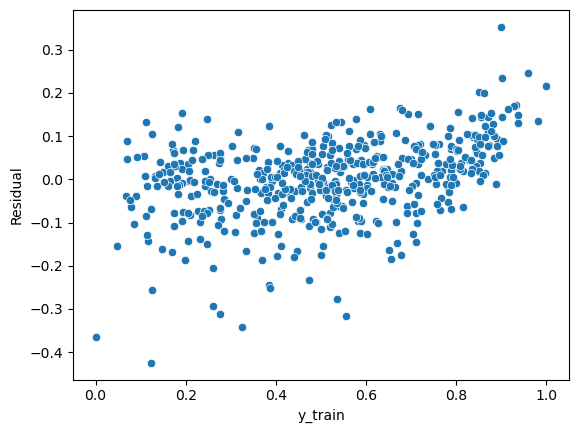

In [52]:
# Homoscedasticity
y_train_pred = lr5.predict(X_train_rfe5)
res = y_train - y_train_pred

sns.scatterplot(y_train, res)
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()



<b>Inference</b> Homoscedasticity is well preserved, except there is slight trend at the end

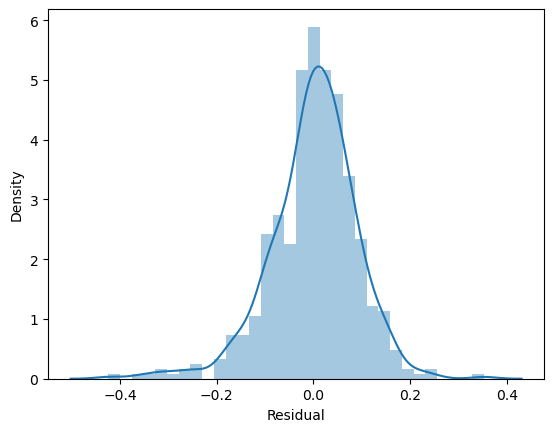

In [53]:
# Normality of error
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residual')
plt.show()

<b> Inference </b> the errors are normally distributed

&nbsp;

&nbsp;

In [54]:
# Scaling 'df_test' dataframe
cols_test = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
df_test[cols_test] = scaler.transform(df_test[cols_test])

# Checking
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_light_rain_&_snow,weathersit_misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Dividing 'df_test' dataframe into 'X_test' and 'y_test'
y_test = df_test.pop('count')
X_test = df_test

In [56]:
# Selecting only those columns which were part of the final model
final_cols = X_train_rfe.columns

X_test = X_test[final_cols]

# Add a constant
X_test_rfe5 = sm.add_constant(X_test)

# Making prediction using the final model
y_test_pred = lr5.predict(X_test_rfe5)

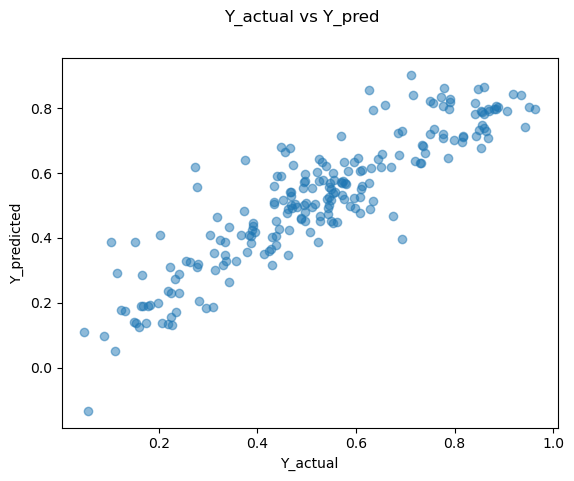

In [59]:
# Plotting 'y_test' and 'y_test_pred'
plt.scatter(y_test, y_test_pred, alpha=.5)
plt.xlabel('Y_actual')
plt.ylabel('Y_predicted')
plt.suptitle('Y_actual vs Y_pred')
plt.show()



In [60]:
# R-squared value for train dataset
print(round(r2_score(y_true = y_train, y_pred = y_train_pred),3))

# R-squared value for test dataset
print(round(r2_score(y_true = y_test, y_pred = y_test_pred),3))

0.839
0.807


In [61]:
# Adj-R2 for training dataset
print(round((lr5.rsquared_adj),3))

# 'N' is the sample size
N = X_test.shape[0]

# 'p' is the number of variables in our model
p = X_test.shape[1]

# R-squared value for test dataset
r2 = round(r2_score(y_true = y_test, y_pred = y_test_pred),3)

# Adj-R2 for test dataset
adjusted_r2 = round(1-(1-r2)*(N-1)/(N-p-1),3)
print(adjusted_r2)

0.835
0.797


In [62]:
# Calculating RMSE (Root Mean Squared Error) for the model which is the square root of MSE (Mean Squared Error).
rmse = round(sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)),4)
rmse

0.0962

## Summary:
As per our final model, the top 3 predictor variables that influences bike bookings are:
- Temperature (positive predictive power)
- Year (positive predictive power)
- weathersit_light_rain_&_snow	(negative predictive power)

#### Thus, management should give importance to these three variables to achieve maximum bike bookings and thus make maximum profit. 